# First Search Program

I defined a function "search", which is the only function I'm going to run in the end.   

* To check cells once they're expanded so we don't expand them again, I define an array called "closed" as the same size as my grid and it has two values( 0 and 1) 0 being it's still open, 1 meaning it's being closed.(You could also use Booleans).

* I initialize the starting location as checked and assign the coordinates to x, y, and a g-value of 0.and my initial open list is going to be just 1 element of my initial coordinates and the g value of 0.

* Inside the code I use two flags--one is found, which will be true when the goal position is found, and one is resign, which will be true if I don't find a goal position and I've explored everything( be the case when my open list just turns empty without finding the goal).

The main code: I repeat while I haven't found a path to the goal and I haven't proven that the problem is unsolvable (Both found and resign are false).

* If my open list is empty, there's nothing to expand, then resign is true, and I print "fail (This is one of the 2 terminating conditions).

* If there is still elements in the open list, the else case comes into place.

 * I use the list sort function, which sorts elements in increasing order from the smallest g-value up.
 * I reversed the list because it's important that the g-value comes first in each of the triplet's.

 * Now I want to pop the element with the smallest number.

 * I then assign the 3 values to x, y, and g, which is my expansion. (Again, g is the first, x and y are the second and third).

 * Now I'm in the position to test whether I reach the goal. If x is the goal 0 and y is the goal 1, I'm done. I call found equals True. I print out the triplet.

 * Now, if I'm not done yet, then here's the interesting case.I'm going through all the possible actions(Delta is an array of 4 different actions)

   * I apply the action to x and y with the addition by applying the corresponding delta vector to construct x2 and y2.
  
   * If x2 falls into the grid and y2 falls into the grid and [x2, y2] is not yet checked, which is tested by the field called "closed," and the grid cell is navigable (there is no obstacle). If all these things are correct, then I found an expansion that I now add to the open list.

      * I increment the cost from g to g2 by adding 1. In this case, cost is 1.
      * Then I append the new [g2, x2, y2] to my open list,
      * I check the coordinate [x2, y2] so I never expand it again.
      * That is the recursion.
      
This is the key of a search algorithm.



In [1]:
# Grid format:
#   0 = Navigable space
#   1 = Occupied space


grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
print('Goal:',goal)
cost = 1

delta = [[-1, 0], # go up
         [ 0,-1], # go left
         [ 1, 0], # go down
         [ 0, 1]] # go right

delta_name = ['^', '<', 'v', '>']

def search(grid,init,goal,cost):
    
    closed=[[0 for col in range(len(grid[0]))] for row in range(len(grid))]
    closed[init[0]] [init[1]]=1
    x=init[0]
    y=init[1]
    g=0
    open=[[g,x,y]]
    
    found=False
    resign=False
    
    #for i in range(len(closed)):
    #    print(closed[i])

    
    while ((found is False) and (resign is False)):
        
    
        if (len(open)==0):
            resign=True
            print('fail')
        else:
            open.sort()
            open.reverse()
            next1=open.pop()

            x=next1[1]
            y=next1[2]
            g=next1[0]

            if ((x==goal[0]) and (y==goal[1])):
                found=True
                print (next1)
                print('Search successful')
            else:
                for i in range(len(delta)):
                    x2=x+delta[i][0]
                    y2=y+delta[i][1]
                    if ((x2>=0) and (x2<len(grid)) and (y2>=0) and (y2< len(grid[0]))):
                        if ((closed[x2][y2]==0) and (grid[x2][y2]==0)):
                            g2=g+cost
                            open.append([g2,x2,y2])
                            closed[x2][y2]=1
    print('To check cells once they are expanded: ')
    for i in range(len(closed)):
        print(closed[i])

Goal: [4, 5]


In [2]:
search(grid,init,goal,cost)

[11, 4, 5]
Search successful
To check cells once they are expanded: 
[1, 1, 0, 1, 1, 1]
[1, 1, 0, 1, 1, 1]
[1, 1, 1, 1, 0, 1]
[1, 1, 0, 0, 0, 1]
[1, 1, 1, 1, 0, 1]


# Expansion Grid

* I make an expand table of exactly the same size but initialized it with -1.

* I introduced a counter in the procedure that counts the expansion.

* And then finally, there's a simple statement When I expand a node ( the else statement after  if (len(open)==0):) I set the expand index of the expanding node to count, and I add 1 to the counter.



In [3]:


# Grid format:
#   0 = Navigable space
#   1 = Occupied space


grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
print('Goal:',goal)
cost = 1

delta = [[-1, 0], # go up
         [ 0,-1], # go left
         [ 1, 0], # go down
         [ 0, 1]] # go right

delta_name = ['^', '<', 'v', '>']

def search(grid,init,goal,cost):
    
    closed=[[0 for col in range(len(grid[0]))] for row in range(len(grid))]
    expanded=[[-1 for col in range(len(grid[0]))] for row in range(len(grid))]
    closed[init[0]] [init[1]]=1
    x=init[0]
    y=init[1]
    g=0
    open=[[g,x,y]]
    
    found=False
    resign=False
    counter=0
    #for i in range(len(closed)):
    #    print(closed[i])

    
    while ((found is False) and (resign is False)):
        
    
        if (len(open)==0):
            resign=True
            print('fail')
        else:
            open.sort()
            open.reverse()
            next1=open.pop()

            x=next1[1]
            y=next1[2]
            g=next1[0]
            expanded[x][y]=counter
            counter +=1

            if ((x==goal[0]) and (y==goal[1])):
                found=True
                print (next1)
                print('Search successful')
            else:
                for i in range(len(delta)):
                    x2=x+delta[i][0]
                    y2=y+delta[i][1]
                    if ((x2>=0) and (x2<len(grid)) and (y2>=0) and (y2< len(grid[0]))):
                        if ((closed[x2][y2]==0) and (grid[x2][y2]==0)):
                            g2=g+cost
                            open.append([g2,x2,y2])
                            closed[x2][y2]=1
    print()
    print('At what step each node was expanded:')
    for i in range(len(expanded)):
        print(expanded[i])

Goal: [4, 5]


In [4]:
search(grid,init,goal,cost)

[11, 4, 5]
Search successful

At what step each node was expanded:
[0, 1, -1, 14, 17, 19]
[2, 3, -1, 12, 15, 18]
[4, 5, 7, 10, -1, 20]
[6, 8, -1, -1, -1, 21]
[9, 11, 13, 16, -1, 22]


# Print Path

I would like to see an output like below, there are arrows to the right and down, which is the optimal action to take in the cells  and in the end a star, which indicates the location of the goal
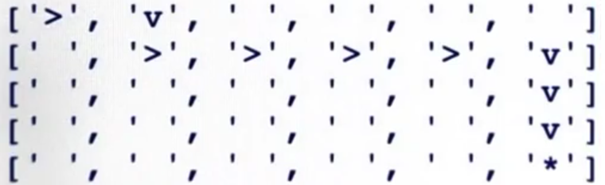



* I make a field called "actions" of the same size as the grid, where I memorize for each cell what action it took to get there.

So for example, if it took an action of go down to get the goal cell from the previous cell then the goal cell would have the action index for the action down.

* In my node expansion routine, where I go from x to x2, which we talked about before, I now add just a single command for the successive state x2 and y2. I memorize the action it took to get there.

Notice I don't associate it with x and y ( the originating state). The reason is in the originating state I'm trying out many different actions and I don't yet know which one succeeds (I associate the action with the successive state not with the originating state).

* Now I have a field (actions)  that memorizes for all the action that it took but I don't have the wonderful representation. This will be compiled into a field called policy, which I initialize with blanks, but it is the same size grid.

* I set the location of the goal explicitly to be the star then I go from the goal backwards.

* I iterate from the goal location, x and y, now in backwards order all the way to the star. Do this as long as x and y haven't become my initial location yet.

* I apply the inverse action. So I find the originating state by taking my current state and subtracting the action exactly the same way I added it before using my action field as finding out what action was actually being used.

* The special symbol will be associated with this specific action

* Then I recourse by setting  x and y to the state x2 y2, which  goes a step further.


In [316]:


# Grid format:
#   0 = Navigable space
#   1 = Occupied space



grid = [[0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
print('Goal:',goal)
cost = 1

delta = [[-1, 0], # go up
         [ 0,-1], # go left
         [ 1, 0], # go down
         [ 0, 1]] # go right

delta_name = ['^', '<', 'v', '>']

def search(grid,init,goal,cost):
    
    closed=[[0 for row in range(len(grid[0]))] for col in range(len(grid))]
    expanded=[[-1 for row in range(len(grid[0]))] for col in range(len(grid))]
    actions=[[-1 for row in range(len(grid[0]))] for col in range(len(grid))]
    closed[init[0]] [init[1]]=1
    x=init[0]
    y=init[1]
    g=0
    open=[[g,x,y]]
    
    found=False
    resign=False
    counter=0


    
    while ((found is False) and (resign is False)):
        
    
        if (len(open)==0):
            resign=True
            print('fail')
        else:
            open.sort()
            open.reverse()
            next1=open.pop()

            x=next1[1]
            y=next1[2]
            g=next1[0]
            expanded[x][y]=counter
            counter +=1

            if ((x==goal[0]) and (y==goal[1])):
                found=True
                print (next1)
                print('Search successful')
            else:
                for i in range(len(delta)):
                    x2=x+delta[i][0]
                    y2=y+delta[i][1]
                    if ((x2>=0) and (x2<len(grid)) and (y2>=0) and (y2< len(grid[0]))):
                        if ((closed[x2][y2]==0) and (grid[x2][y2]==0)):
                            g2=g+cost
                            open.append([g2,x2,y2])
                            closed[x2][y2]=1
                            actions[x2][y2]=i
    policy=[[' ' for col in range(len(grid[0]))] for row in range(len(grid))]
    x=goal[0]
    y=goal[1]
    policy[x][y]='*'

    while(x!=init[0] or y!=init[1]):
        x2=x-delta[actions[x][y]][0]
        y2=y-delta[actions[x][y]][1]
        policy[x2][y2]=delta_name[actions[x][y]]
        x=x2
        y=y2
    print()
    print('Expansion:')
    for i in range(len(expanded)):
        print(expanded[i])
    print()
    print('Policy:')
    for i in range(len(policy)):
        print(policy[i])


Goal: [4, 5]


In [317]:
search(grid,init,goal,cost)

[9, 4, 5]
Search successful

Expansion:
[0, -1, -1, -1, -1, -1]
[1, -1, 12, -1, -1, -1]
[2, -1, 9, 13, -1, -1]
[3, -1, 7, 10, 14, -1]
[4, 5, 6, 8, 11, 15]

Policy:
['v', ' ', ' ', ' ', ' ', ' ']
['v', ' ', ' ', ' ', ' ', ' ']
['v', ' ', ' ', ' ', ' ', ' ']
['v', ' ', ' ', ' ', ' ', ' ']
['>', '>', '>', '>', '>', '*']


# Implement A*

* the heuristic function is given you of simply the minimum steps it takes to the goal in the absence of obstacles and we can construct the A* algorithm by maintaining not just the  G-values but also the F-values, which is the G- plus the heuristic.

* The very first thing we do is expand elements in the open list to not just contain G as before but also F. I alos included h, which is not necessary but I did it anyhow. Now we have five tuples, where g is defined as before, h is heuristic function value of the cell x and y and f is the sum of the two.

* The reason why I put f left is I need this for my sort trick, I can sort according to F and the element,  when I remove, will be the one with lowest f-value not the lowest g-value.

* I need to restructure the index into the next1 structure.

* By computing all possible actions (expand wining element section) and  expanding a node from the open list which has all conditions, I compute the heuristic function for the new expanded node called h2 and in the next line of code I compute the new sum of the g value and the h-value called f2.
 
* Then the new five things (the new f value, the new g value the new h value and corresponding x and y value) will be appended to the open list.


In [275]:


# Grid format:
#   0 = Navigable space
#   1 = Occupied space


grid = [[0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]

heuristic = [[9, 8, 7, 6, 5, 4],
             [8, 7, 6, 5, 4, 3],
             [7, 6, 5, 4, 3, 2],
             [6, 5, 4, 3, 2, 1],
             [5, 4, 3, 2, 1, 0]]

init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
print('Goal:',goal)
cost = 1

delta = [[-1, 0], # go up
         [ 0,-1], # go left
         [ 1, 0], # go down
         [ 0, 1]] # go right

delta_name = ['^', '<', 'v', '>']

def search(grid,init,goal,cost):
    
    closed=[[0 for col in range(len(grid[0]))] for row in range(len(grid))]
    expanded=[[-1 for col in range(len(grid[0]))] for row in range(len(grid))]
    actions=[[-1 for col in range(len(grid[0]))] for row in range(len(grid))]
    closed[init[0]] [init[1]]=1
    x=init[0]
    y=init[1]
    h=heuristic[x][y]
    g=0
    f=g+h
    open=[[f,g,h,x,y]]
    
    found=False
    resign=False
    counter=0
    #for i in range(len(actions)):
    #   print(actions[i])

    
    while ((found is False) and (resign is False)):
        
    
        if (len(open)==0):
            resign=True
            print('fail')
        else:
            open.sort()
            open.reverse()
            next1=open.pop()

            x=next1[3]
            y=next1[4]
            g=next1[1]
            expanded[x][y]=counter
            counter +=1

            if ((x==goal[0]) and (y==goal[1])):
                found=True
                print (next1)
                print('Search successful')
            else:
                #expand wining element and to new open list  
                for i in range(len(delta)):
                    x2=x+delta[i][0]
                    y2=y+delta[i][1]
                    if ((x2>=0) and (x2<len(grid)) and (y2>=0) and (y2< len(grid[0]))):
                        if ((closed[x2][y2]==0) and (grid[x2][y2]==0)):
                            g2=g+cost
                            h2=heuristic[x2][y2]
                            f2=g2+h2
                            open.append([f2,g2,h2,x2,y2])
                            closed[x2][y2]=1
                            actions[x2][y2]=i
    policy=[[' ' for col in range(len(grid[0]))] for row in range(len(grid))]
    x=goal[0]
    y=goal[1]
    policy[x][y]='*'

    while(x!=init[0] or y!=init[1]):
        x2=x-delta[actions[x][y]][0]
        y2=y-delta[actions[x][y]][1]
        policy[x2][y2]=delta_name[actions[x][y]]
        x=x2
        y=y2
    print()
    print('Expansion:')
    for i in range(len(expanded)):
        print(expanded[i])
    print()
    print('Policy:')
    for i in range(len(policy)):
        print(policy[i])

Goal: [4, 5]


In [276]:
search(grid,init,goal,cost)

[9, 9, 0, 4, 5]
Search successful

Expansion:
[0, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1]
[2, -1, -1, -1, -1, -1]
[3, -1, -1, -1, -1, -1]
[4, 5, 6, 7, 8, 9]

Policy:
['v', ' ', ' ', ' ', ' ', ' ']
['v', ' ', ' ', ' ', ' ', ' ']
['v', ' ', ' ', ' ', ' ', ' ']
['v', ' ', ' ', ' ', ' ', ' ']
['>', '>', '>', '>', '>', '*']


# Dynamic Programming

1. We have a value function that is the same size as my world, and I initialize with 99 everywhere (this has to be evaluated as large enough it doesn't conflict with any actual value).
2. I introduced the variable "change," which I set to True in the beginning. While change is true, I update, but I nearly set change to False. The only way to come back to True is that I actually changed something.
3. By update the value function a number times (I don't know how often but as long as change something).
4. Now I go through all the grid cells in a fixed order (It happens to be not very efficient, but certainly gets the job done).
5. I first check if the grid cell I'm considering is the goal (Here is a typical case where I check for change) .If the value is presently correctly set to 0, I don't do anything. If it's larger than 0, such as 99, then I set it down to 0, and I've just changed something. Therefore, I set the change flag back to True.
6. If it's not a goal cell, then is my full update function.I go through all the actions. I project a potential next state upon executing an action by adding the corresponding delta to the x and y. That gives me x2 and y2. I test whether x2 and y2 are legitimate states (For that they have to be inside the grid and I check whether the numbers are larger than 0 and smaller than the dimension of the grid and it has to be an action that action navigable grid cell).
7. If that's the case, My new value is the value of this future grid cell plus the cost per step, which happens to be 1.
8. Now, if this new  value is better than the value I have already, which means it is smaller,then I assign this new value to my original grid cell x and y, plus of course the cost step.Then I know I've changed something.Therefore I set change to "True," and the procedure repeats.




In [318]:


grid = [[0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1 # the cost associated with moving from a cell to an adjacent one

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

def optimum_policy(grid,goal,cost):
    #1
    value = [[99 for row in range(len(grid[0]))] for col in range(len(grid))]
    #2
    change = True
    #3
    while change:
        change = False
        #4
        for x in range(len(grid)):
            for y in range(len(grid[0])):
                #5
                if goal[0] == x and goal[1] == y:
                    if value[x][y] > 0:
                        value[x][y] = 0

                        change = True
                #6
                elif grid[x][y] == 0:
                    for a in range(len(delta)):
                        x2 = x + delta[a][0]
                        y2 = y + delta[a][1]

                        if x2 >= 0 and x2 < len(grid) and y2 >= 0 and y2 < len(grid[0]) and grid[x2][y2] == 0:
                            #7
                            v2 = value[x2][y2] + cost
                            #8
                            if v2 < value[x][y]:
                                change = True
                                value[x][y] = v2

    return value


In [319]:
optimum_policy(grid,goal,cost)

[[11, 99, 7, 6, 5, 4],
 [10, 99, 6, 5, 4, 3],
 [9, 99, 5, 4, 3, 2],
 [8, 99, 4, 3, 2, 1],
 [7, 6, 5, 4, 99, 0]]

**I should warn you this is not very efficient.The reason why it is not efficient is that value slowly propagates from the end towards the beginning.But leaving this concern aside, it actually computes the correct value function.There are ways to make it more efficient.**

# Print Optimum Policy


1. I defined a field called "policy" of the same size as my grid, initialized it with lots of spaces.

2. Now in my dynamic programming procedure check for whether we have reached the goal state, and we have. Then I set the corresponding element to star, using a single new command that just sets policy [x, y] to star.

3. Finally, in my big update loop where I assign an improved value to a grid cell [x, y] based on its successor (section #8), I assign to the policy the character that corresponds to the action that led to that update over here.

Put differently, as we look for a better value we look into all possible directions by looping over all actions. If one of those succeeds, I just memorize in my policy function what that action was with a command “    policy[x][y]=delta_name[a]”.




In [310]:
grid = [[0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1 # the cost associated with moving from a cell to an adjacent one

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

def optimum_policy(grid,goal,cost):

    value = [[99 for row in range(len(grid[0]))] for col in range(len(grid))]
    #1
    policy = [[' ' for row in range(len(grid[0]))] for col in range(len(grid))]

    change = True

    while change:
        change = False
        for x in range(len(grid)):
            for y in range(len(grid[0])):
                if goal[0] == x and goal[1] == y:
                    if value[x][y] > 0:
                        value[x][y] = 0
                        #2
                        policy[x][y]='*'

                        change = True
                elif grid[x][y] == 0:
                    for a in range(len(delta)):
                        x2 = x + delta[a][0]
                        y2 = y + delta[a][1]

                        if x2 >= 0 and x2 < len(grid) and y2 >= 0 and y2 < len(grid[0]) and grid[x2][y2] == 0:
                            v2 = value[x2][y2] + cost
                            if v2 < value[x][y]:
                                change = True
                                value[x][y] = v2
                                #3
                                policy[x][y]=delta_name[a]

    return policy


In [311]:
optimum_policy(grid,goal,cost)

[['v', ' ', 'v', 'v', 'v', 'v'],
 ['v', ' ', 'v', 'v', 'v', 'v'],
 ['v', ' ', 'v', 'v', 'v', 'v'],
 ['v', ' ', '>', '>', '>', 'v'],
 ['>', '>', '^', '^', ' ', '*']]

# Left Turn Policy

Well, in real traffic, often you have to wait for oncoming traffic. Let me say in our planning, left turns are more expensive. In fact, I should mention that parcel delivery services that plan for optimal routes of trucks like FedEx and UPS in the States, they actually plan routes that try to avoid left turns during rush hours, because it just takes much longer to do left turns.

For this reason, we would like to punish left turns, to perform this policy we need change cost for each action we have. Suppose we have a car like figure  below. This car now has its state an x, a y, and an orientation (theta).By orientation for simplicity is chosen from 4 possible directions (up, down, left, and right).  I'd like to get to the location B (facing left). Realize that now the state space is 3-dimensional,I now would like to implement a dynamic programming planner that gives me the optimal path for going from A to B by considering the cost policy for each action.


There are three principle actions.
* One is move in which the car just goes 1 grid cell forward in its present orientation. It doesn't turn at all. That could be applied anywhere in the maze in any direction.
* One is turn left and then move.
* The last one is turn right and move.


You can see there in the map a street that's navigable, and the loop on the right side (remember that now this state space is 3-dimensional, not 2- dimensional).

* Our goal is to move to cell [2, 0], 

* The initial state has not just a position of [4, 3] but also an orientation of 0 (It's a 3-dimensional state)

The interesting things are actions, we have 3 actions. We can add to the index orientation -1, 0, or 1.

* If we add -1 we jump 1 up in the cyclic array, which is the same as doing a right turn. For example, if you go from go left to go up, that the same as turning right.

* if we add +1, that's the same as turning left.
* If we leave the orientation unchanged, then we go straight.

These actions come with different costs:

* Right now the right turn costs me 20
* Going straight costs me 1 
* Going left costs me 1 as well, which, as we all know, makes the left turn the preferred solution over here.

If I were to increase the cost for the left action to 20, then my path to get the location changes.


There is one more hint. The value function itself is 3-dimensional and it has inside 4 identical arrays of the size of the grid concatenated into a mega grid and initialized all by a very large value (999) in this case.











### The solution

1. The solution, I have the value function initialized. It has lots of 999s. The policy is a similar function in 3D. I have a function called policy2d, which is the one I'm later going to print. That's the same in 2D.
2. My update function is exactly the same as before for dynamic programming.While change exists, go through [x, y]'s and all orientations of which there are 4.
3.  If you found the goal location then update the value and if there's an actual update, set "change" to True and also mark it as the goal location.
4.  Otherwise, if our grid cell is navigable at all, We go through the 3 different actions. When we tag the i<sub>th</sub> action, we add the corresponding orientation change to our orientation, modulo 4. It's a cyclic buffer, (this might subtract 1., Keeping it the same  or will add 1 to orientation). Then we apply the corresponding new motion model to x and y to obtain x2 and y2.
5. If we arrived at a valid grid cell in that it's still inside the grid and it's not an obstacle, then like before we add to the value the value of this new grid cell plus the cost of the corresponding action.This is non-uniform, depending on what action we pick now.
6. By improving the existing value we set the old value to be the new value, and we mark change as True. We also memorize the action name as before.
7. However, I want to print out a 2-dimensional table, not a 3-dimensional table. To get to the 2-dimensional table, I now need to be sensitive of my initial state.
8. I set the initial state to be x, y, and orientation and All I do now is run the policy with the very first state, While I haven't reached the goal state quite yet as indicated by checking for the star in my policy table.
9. Now, my policy table has a hash mark R and L,

    * If it's a hash mark, we just keep our orientation the way it is.

    * If it's R, I turn to the right. 

    * L is turn to the left.
10. I apply my forward motion and I update my new x and y coordinates to be the corresponding after the motion and I update my orientation to be o2.
11. Finally, I copy the 3-dimensional symbol for my policy straight into the 2-dimensional array. This is the array that I finally print.



In [346]:
forward = [[-1,  0], # go up
           [ 0, -1], # go left
           [ 1,  0], # go down
           [ 0,  1]] # go right
forward_name = ['up', 'left', 'down', 'right']

# action has 3 values: right turn, no turn, left turn
action = [-1, 0, 1]
action_name = ['R', '#', 'L']

# EXAMPLE INPUTS:
# grid format:
#     0 = navigable space
#     1 = unnavigable space 
grid = [[1, 1, 1, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1, 1]]

init = [4, 3, 0] # given in the form [row,col,direction]
                 # direction = 0: up
                 #             1: left
                 #             2: down
                 #             3: right
                
goal = [2, 0] # given in the form [row,col]

cost = [2, 1, 20] # cost has 3 values, corresponding to making 
                  # a right turn, no turn, and a left turn


# EXAMPLE OUTPUT:
# calling optimum_policy2D with the given parameters should return 
# [[' ', ' ', ' ', 'R', '#', 'R'],
#  [' ', ' ', ' ', '#', ' ', '#'],
#  ['*', '#', '#', '#', '#', 'R'],
#  [' ', ' ', ' ', '#', ' ', ' '],
#  [' ', ' ', ' ', '#', ' ', ' ']]
# ----------

# ----------------------------------------
# modify code below
# ----------------------------------------

def optimum_policy2D(grid,init,goal,cost):
    value = [[[999 for row in range(len(grid[0]))] for col in range(len(grid))],
             [[999 for row in range(len(grid[0]))] for col in range(len(grid))],
             [[999 for row in range(len(grid[0]))] for col in range(len(grid))],
             [[999 for row in range(len(grid[0]))] for col in range(len(grid))]]
    #1
    policy = [[[' ' for row in range(len(grid[0]))] for col in range(len(grid))],
              [[' ' for row in range(len(grid[0]))] for col in range(len(grid))],
              [[' ' for row in range(len(grid[0]))] for col in range(len(grid))],
              [[' ' for row in range(len(grid[0]))] for col in range(len(grid))]]
    
    policy2D=[[' ' for row in range(len(grid[0]))] for col in range(len(grid))]

    
    change=True
    while change:
        change=False
        for x in range(len(grid)):
            for y in range(len(grid[0])):
                for orientation in range(len(forward)):
                    if x==goal[0] and y==goal[1]:
                        if value[orientation][x][y]>0:
                            change=True
                            value[orientation][x][y]=0
                            policy[orientation][x][y]='*'
                    elif grid[x][y]==0:
                        for i in range(len(action)):
                            o2=(orientation+action[i])%4
                            x2=x+forward[o2][0]
                            y2=y+forward[o2][1]
                            
                            if x2 >= 0 and x2 < len(grid) and y2 >= 0 and y2 < len(grid[0]) and grid[x2][y2] == 0:
                                v2=value[o2][x2][y2]+cost[i]
                                if v2<value[orientation][x][y]:
                                    value[orientation][x][y]=v2
                                    policy[orientation][x][y]=action_name[i]
                                    change=True
    x=init[0]
    y=init[1]
    orientation=init[2]
    policy2D[x][y]=policy[orientation][x][y]
    while policy[orientation][x][y]!='*':
        if policy[orientation][x][y]=='#':
            o2=orientation
        elif policy[orientation][x][y]=='R':
            o2=(orientation-1)%4
        elif policy[orientation][x][y]=='L':
            o2=(orientation+1)%4
        x=x+forward[o2][0]
        y=y+forward[o2][1]
        orientation=o2
        policy2D[x][y]=policy[orientation][x][y]

    return policy2D


In [347]:
optimum_policy2D(grid,init,goal,cost)

[[' ', ' ', ' ', 'R', '#', 'R'],
 [' ', ' ', ' ', '#', ' ', '#'],
 ['*', '#', '#', '#', '#', 'R'],
 [' ', ' ', ' ', '#', ' ', ' '],
 [' ', ' ', ' ', '#', ' ', ' ']]

In [329]:
len(action)

3